In [1]:
import numpy as np
import pandas as pd

from gtda.time_series import SlidingWindow
from gtda.diagrams import PersistenceLandscape
from gtda.homology import VietorisRipsPersistence

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
pd.set_option('display.max_columns', None)
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
# !pip install spectrum 
# from spectrum.periodogram import speriodogram

import statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

from pylab import *

In [2]:
# Functions to compute the Lp norms
# Find the range of x values from the persistence diagram:
def Ftseq(diagram):
    births =[]
    deaths =[]
    for pair in diagram:
        if pair[2] == 1:
            births.append(pair[0])
            deaths.append(pair[1])
    return np.linspace(min(births), max(deaths), 100)

# Calculate Lp norm:
def Lpnorm(tseq, landscapevalues, p = 1):
    norms = []
    if p.lower() == 'auc':
        for point in zip(tseq,landscapevalues):
            norms.append(np.trapz(landscapevalues, tseq))
    else: 
        for point in zip(tseq,landscapevalues):
            norms.append(np.linalg.norm(point, p))        
    return sum(norms)

## Using Sine and Cosine

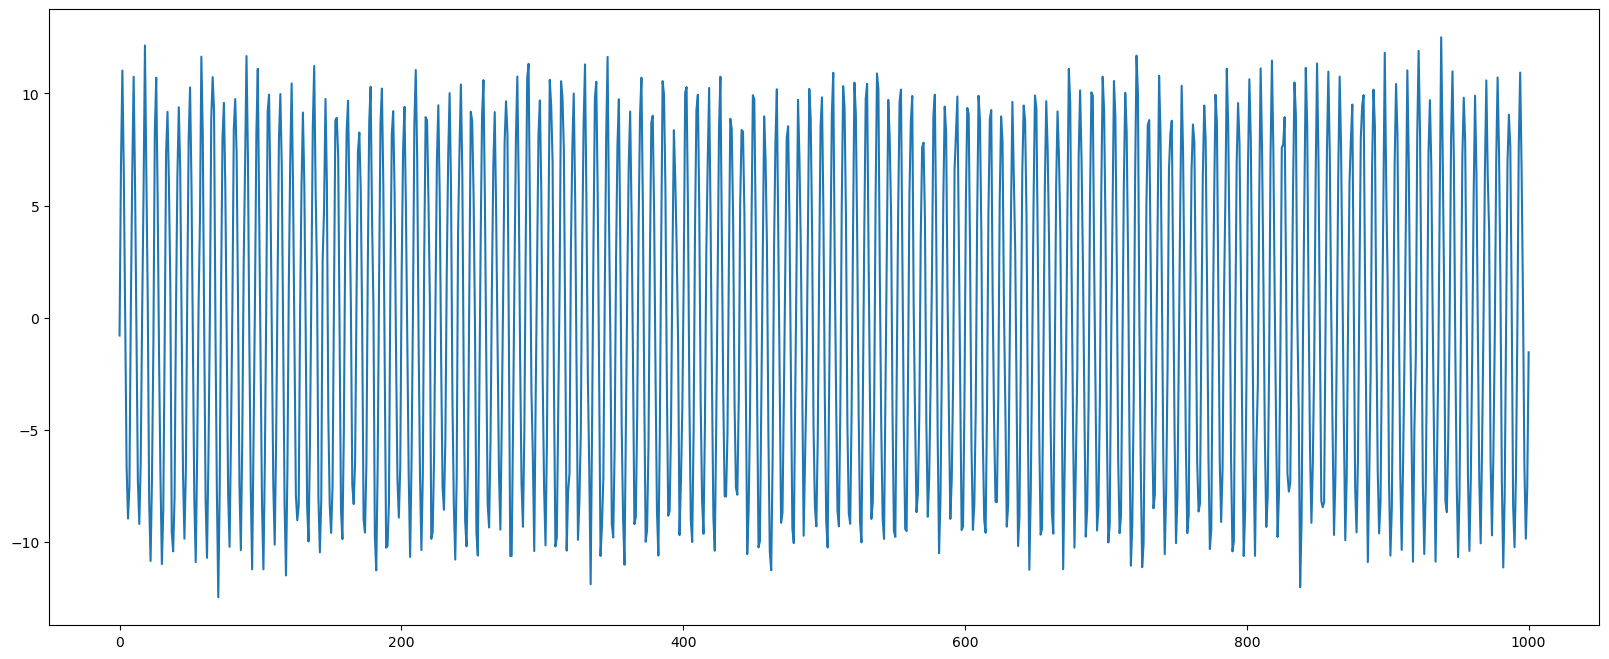

period = 8.0


In [81]:
x = np.linspace(0, 1000, 1000)
f1 =  math.pi * (1/4)
y1 = 10*(np.sin(f1*x) + np.random.normal(scale=.1, size=len(x)))
plt.figure(figsize = (20,8))
plt.plot(x,y1)
plt.show()
print('period = ' + str(2*math.pi/f1))

In [ ]:
lags =[]
avgnorms = []
for lag in range(0,49):
    simulated_data = pd.DataFrame({'Simulated Data 1' : y1
                 })
    simulated_data['Simulated Data 2'] = simulated_data['Simulated Data 1'].shift(lag)
    simulated_data = simulated_data.dropna()
    
    dataPct = simulated_data.pct_change()
    dataPct = dataPct.dropna()
    # dataPct.head()

    # Create point cloud
    window_size = 150
    stride = 1
    df = dataPct
    X = df
    y = df.index
    SW = SlidingWindow(size=window_size, stride=stride)
    X_sw, yr = SW.fit_transform_resample(X, y)

    # Calculate the norms for each of the windows in the multivariate sliding window

    # Initialize empty list
    Norms = np.empty(window_size)
    Norms[:] = np.nan
    Norms = list(Norms)
    vrp = VietorisRipsPersistence()
    pl = PersistenceLandscape()
    for pointcloud in X_sw:
        persistencediagram = vrp.fit_transform(pointcloud.reshape(1, *pointcloud.shape))
        landscapedata = pl.fit_transform(persistencediagram)
        tseq = Ftseq(persistencediagram[0])
        yvalues = landscapedata[0][1]
        Norms.append(Lpnorm(tseq, yvalues, p = 'auc'))

    avgnorm = pd.Series(Norms).mean()
    avgnorms.append(avgnorm)
    lags.append(lag)


In [ ]:
plt.figure(figsize = (20,8))
plt.plot(lags, avgnorms)

In [ ]:
## Using Sine and Cosine

x = np.linspace(0, 1000, 1000)
f1 =  math.pi * (1/4)
y1 = 10*(np.sin(f1*x) + np.random.normal(scale=.1, size=len(x)))
plt.figure(figsize = (20,8))
plt.plot(x,y1)
plt.show()
print('period = ' + str(2*math.pi/f1))

plt.figure(figsize = (20,8))
plt.plot(x[:100],np.array( y1)[:100])
plt.show()

lags =[]
avgnorms = []
for lag in range(0,49):
    simulated_data = pd.DataFrame({'Simulated Data 1' : y1
                 })
    simulated_data['Simulated Data 2'] = simulated_data['Simulated Data 1'].shift(lag)
    simulated_data = simulated_data.dropna()
    
    dataPct = simulated_data.pct_change()
    dataPct = dataPct.dropna()
    # dataPct.head()

    # Create point cloud
    window_size = 150
    stride = 1
    df = dataPct
    X = df
    y = df.index
    SW = SlidingWindow(size=window_size, stride=stride)
    X_sw, yr = SW.fit_transform_resample(X, y)

    # Calculate the norms for each of the windows in the multivariate sliding window

    # Initialize empty list
    Norms = np.empty(window_size)
    Norms[:] = np.nan
    Norms = list(Norms)
    vrp = VietorisRipsPersistence()
    pl = PersistenceLandscape()
    for pointcloud in X_sw:
        persistencediagram = vrp.fit_transform(pointcloud.reshape(1, *pointcloud.shape))
        landscapedata = pl.fit_transform(persistencediagram)
        tseq = Ftseq(persistencediagram[0])
        yvalues = landscapedata[0][1]
        Norms.append(Lpnorm(tseq, yvalues, p = 'auc'))

    avgnorm = pd.Series(Norms).mean()
    avgnorms.append(avgnorm)
    lags.append(lag)


plt.figure(figsize = (20,8))
plt.plot(lags, avgnorms)